In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# load data
path = '/Users/liviaclarete/coding/nlp-okeyso/data/01_clean_data.csv'
df = pd.read_csv(path)
print(df.shape)
df.head()

(8292, 6)


,name,question_id,body,users,messages,date
0,Ask a College Student,8286,Hello\n,1,1,2020-02-06 23:14:50
1,Ask a College Student,8259,"Hi, I haven’t been to a college because I move...",2,2,2020-02-01 17:46:54
2,Ask a College Student,8219,I think I'm addicted to nicotine but I can go ...,2,2,2020-01-22 20:56:18
3,Ask a College Student,8218,I think I'm addicted to nicotine but I can go ...,1,1,2020-01-22 20:56:13
4,Ask a College Student,8217,I think I'm addicted to nicotine but I can go ...,2,6,2020-01-22 20:56:13


In [7]:
text = df.body.to_list()
print(len(text))

8292


In [11]:
# get the most used words
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

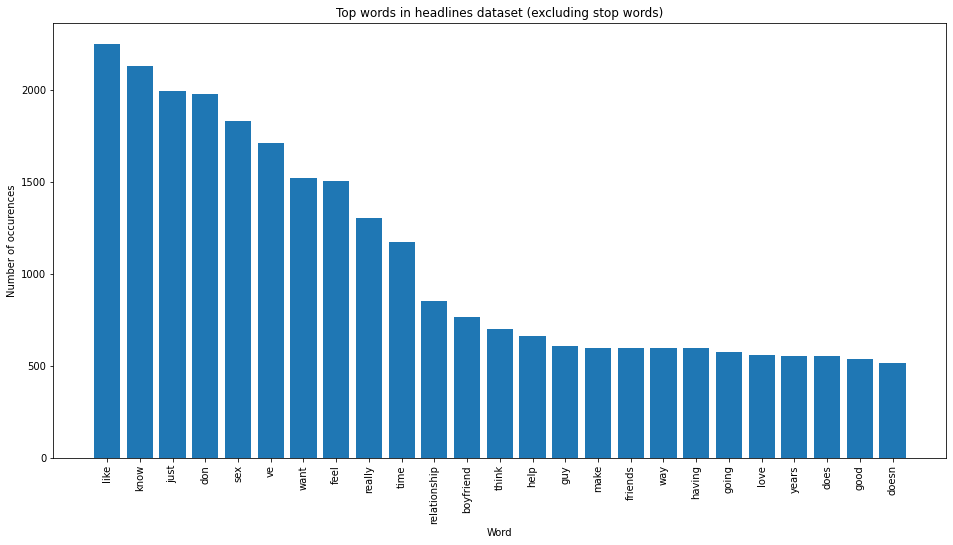

In [23]:
count_vectorizer = CountVectorizer(stop_words='english')

words, word_values = get_top_n_words(
    n_top_words=25,
    count_vectorizer=count_vectorizer,
    text_data=df.body
)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()